In [1]:
import Pkg; Pkg.activate("C:/Users/s151781/AppData/Local/Julia-1.3.1/GN/Project.toml")
using Revise
using Distributions
using PyPlot
using FFTW
using Compat
using WAV
using DSP
using Base64
using ForneyLab
using LinearAlgebra
using ProgressMeter
using Distributed

include("../functions/auxiliary/audioplayer.jl")
include("../functions/auxiliary/workflow.jl")
include("../functions/auxiliary/fourier.jl")
include("../functions/auxiliary/visualization.jl")
include("../functions/auxiliary/buffer.jl")
include("../functions/preprocessing.jl")
include("ARFB_fast_cossin.jl")

Activating environment at `C:\Users\s151781\AppData\Local\Julia-1.3.1\GN\Project.toml`


In [2]:
# load speech data
xi, fs = wavread("../data/airco.wav", format="native")
fs = Int(fs)
xi = convert(Array{Float64,1}, xi[1*fs:4*fs])

# pre-process signals
yi = preprocess(xi, fs) 

N = length(yi)
t = collect(1:N)/8000
fs = 8000

audioplayers(yi, fs=8000);

<source src="data:audio/wav;base64,UklGRkB3AQBXQVZFZm10ICgAAAD+/wEAQB8AAAB9AAAEACAAFgAgAAAAAAADAAAAAAAQAIAAAKoAOJtxZGF0YQR3AQCsZgw+p76QPi+woD5FjbU+F4u1PmTHzD58EOo+RkkDP68iDT9uSgM/fvvdPlgozT5cGbw+RErRPjlKzz6kJMc+/Q6YPlbLjz4wAJI+jjquPnVEmD4Qyns+m7mBPu+gBj7PAi8+AvwiPq5FVbyWY0G+Eud+vkwLKL4wNr85DNvOPfZu+7sP6c69oz08vs+tA74t2Dy9eZkNviFKLL5ECIC+q0LNvqfC5b5Zjui+GfqSvv1emb6PMni+uFKbvmhQt74yJL6+ikftvhtDBr8ujP6+lfYJv2A/9b5XacS+GX5yvmTGZL6xk5e+wR6PvuE2b76Ga1q+SvO7vT1nVr11UFy8VkvKvUDbjL5KjKS+T/FbvjGhaL2sHnA9oNyhPOYblL1og6K9tQaLPXjsbT5OOmQ+F48+PhKelD3HVfY8o/CAPtUi6T6Dvwc/OIbcPoggnT5RuK8+w6H9Ph88Ij989Ck/23IKPzeTFz+YjSE/bmE1PwnEKj+sowg/Uuz1PsDU6T5DwOg+nP3pPr6Cvj5Cgoo+hlqKPi4JvT6BIas+3g4pPgaRn7xMnB+9BJymPIs87z2VFO88IIYDvvreq75+uta+bsyzvt3aUL4bgF2+tKCkvgnXyL7krOC+QlDsvh+F3b5x2dy+I3HVvpRRvb6sbre+smyqvpQjtr7owIG+i5h4vrJLg77gIl++vn9uvuAAg77KJVC+66iFvsqAhb4x/nq+lhJ7vjaVQb6xLQ2+7wOJvovf/L4zAhi/5d4Jv7PZ177oUIe+F1FVvmVAYL752bm+20e/vm6VuL6UrKq+2WhpvmVBCr6o8yK+OJTQvUN8iL3q7Ym9ercsObeKLj7VaaI+df7CPvLdxT6+QZs+XtOZPlMHxj7qcAM/EgUlP2GFKT8w7RA/rET/PqVrAD/1UiE/E9VCPxHIKj+7BAg/82e7PkFFoz6oZ64+yx/4Pg2PMz+hCD8/Du4wPxBoCj+4fQA/JpHePr1n7D7AbNY+HsKbPiyQbT6c8UE+O0s2PlYJBT4rWd48ToyNvQ4TXL4sFm++ZuFvvlNlhr6S67K+P4wBv9dSIr8xJB6/0SEKv3/U8r4obQe/tAEev1yMOb+3/TG/tyYav1L7G79Snye/x1QSv8OkB7+CguK+OvXevooz275V7dW++ca5vmGdkL7H1pS+glSIvrAVYL5yEzy+aPk2vskKJL7iCzK+3U26vRPsRL5oW9K9tG6VPR5TpT2+gvs8RejvvZV7QL0/p2C9GlCNuBxCTD6Wj2o+2+eJPT/sbLy42TU95K9hPpgkvz7Ak+o+7bLjPiDhqz6PC7o+hYDKPqPM2z5Ba9U+yNrNPvZPtj40C5c+uD1+PuIVrj5427g+/orWPtdH0T7xxbo++fWPPjZRRT4kjKs9JbY8PuGsfz6/dLE+iIqnPl1qSj5atfE9UDWfPejhaz4RXq4+F/y7PnfrqD7Q+JY964jPPO/Ppj2WOrs9pW+CPYvAtrw+PTO9kaN7vWUy2rvDab084jUSvQY1Eb771lG+XdBdvse2KL7gc02+Q8LmvhYNA7+QMBW/FDANv882877uVQq/srosvx/SS78Erjy/GBEtv1ZFFr/8I/m+TB4Sv4xBD79a9f++CrGUvuUKQr5JOE2+eVQovuOR+b2kCP67IT2iPcQ4xj3j4909DnskPq+xkT4wMqA+VN99PrbBIj4cPaU9kK59PXLCmT5NVb4+A1a7PipelD6yua89crFKPXwPlD3RfYg+Ce6kPrTzfT67618+kA+KPj38nT5Sr7s+e+LWPtgGyz53xas+76onPlc0lD64V7s+In7cPkgVzj4yWKw+z4V+Pnk/eT4WCpE+LL+FPqlsbT75nyI+k9b1Pa8uID4Q0/49D/MJPjCWEj7GOc09Eyi1Pb4mRz10XnI97HrRPLWLq712iwm+ecnIvUq8kr1v+Cy9b5WQu9T99b1uI06+HMJzvovfWb5lrdm97A89vrIIq752dty+W4Lmvj9qB78jugK/u54Bv19iA7+iXQO/O/UUv/zrKL+K8FO/9IxtvyIzXL/lkU2/HD8vv7y6Hr8zxxa/GikUv2GHAL9POdG+XBKgvsUmOL4dWvC9fc7JvXROxj1h8m8+dFDDPly4AD+IOOA+F5uzPi1MtT4ROsw+JcLyPgOiHz94uyM/GfgSPxwk8j7hW+U+awwTP3hyHz+QHhI/22z/PlNZ2z420fY+smEOPygnCD+UMPg+Kh+/PglKtz40bK4+uJXAPi1owj7IDqY+kICOPsJyoj7tXLI+N3CsPvXhaD7y/UI+B+VlPmvghT6AyKc+bbuHPnM3Kj6FV7y6cNrIvb8bjL2AwCG+phRlvh26ib51taa+B3NqvjZzVb7uFo6+cxjevvsaFL/+Awy/tXP/vuoBB78QZxq/T2Uuv6hiH7/h3AC/a9Sovsu/iL6Z18i+AtUNv2YJHL8C1AO/RKO/vob3pr71DZW+FI2cvvO6o76hNUi+cJo3vpUyQ778jBq+ryHbvQ7bjb1Osk69w8+qva5wTb6J5k2+FqBDvVhb9j0IUFM+eo34PWXp2j0wRdI8PQYIPgOVHj68EIA90kVLPdSodj3A9zM+suOOPltQoT6oNpc+gT+mPs62xj7RP/k+rPcZP/6mIj8ECwQ/64HmPpdH7j58tc4+MK4KP+TX8z4jw+A+saUEP1OMDz+u0Ac/TNYIP9r0Gz9FXgc/jMXxPm9jzT4kZZs+FJCUPscHtT4d3a0+slNVPjSIwz0zyTO89VQFvrfLBL4qo4K+rnB0vq4ok74Vx6K+YZ/MvmIbFL/4USe/+BUVv8PhAb9dAgi/76Ukv8W7Vb/932q/ilhjv+32Q7+G1g+/PhMGv7To/L7jPfC+p0rzvv5b4b4EtcW+Kbfmvgips75cvYq+xKQHvi/Ohb053tO998hNvnaxbL72Qxq+TkGHPd/9ZD2J+x+937vIvZFza72C9F09IJtRPjzxbT4hXD8+GkAlPiUEaT4V2Yo+4+LNPoyl9z7betQ+asvHPqNKzD7MFtc+ePubPqgbXD55QMs9T+9XPtQFuz57tP4+5MThPmnYmD6BXSA+pwFCPlCsuD6vheg+pdvpPgZg9z5tnOQ+1CwUP9i7Fj/IEBg/0In8PuWLuj4OW5w+UGe3PqxC9T4xtA0/PqX6Pshypz4boz8+uT4GPmCwJT7J0So+zHbpPa1U+bydbaC98b4Qvrx62LziwwA9SLpsPI2P7r09Xny+3ty6vnvNBr89JBi/+q0ev2XjF797XiK/zWwUv3HdC78UFRe/GJISv6QXDL9J8h2/eagmv4zaKL/j+y2/Z+pOv5aSTL8fpjK/R3stv8qqGb9rCPu+qY/vvu9Dxr5cV8u+/R7ivuJvrb49G56+E9WOvjexVr6h5VG+D03OvbuhuDwp4e49VzpuPi48gT5nF5Q+n5yVPjp8hD7dd6Y+Ala/PnT9rD7gIro+VS2xPvoDmT721s8+jgfIPgXD0T70Hrs+ubiaPki7NT46eg4+1SNHPeOkPj4XwZM+oWbEPlMMqz6hzmg+64OPPnTJuT4w3cE+p9GMPo+9Fz7qHm88unRmPnvJ4D4YWBU/g6MJP5Kzrz7VjAY+mhqHPX8z+j1Yv5s+U16iPrAzVD5Gtim9TB80vpdW7r2WfG89XDm9PU0cJL31fBK+P+Jivn3pnb7o7a2+RT/Cvs2M8b7PQAy/tBr2vuY+777ZjM++CRvKvmbB5b7RTOK+zl/3vlBWAb+n6/G+ZjX0voqMx76IPIq+gxBZvnLeKL5O8Ui+zOVDvvpFHTyyk4E+SHvTPvSpoz7SnBo+L+HzPHd+uTzrcCU+aBuhPp1Psj45tqw+87w/Pr1t8z29O4A+bZe+Pt6c2j6x0

In [3]:
f = collect(0:fs/25:fs/2)
bufsize = length(f)

# create fg
eval(generateARFB(length(f), bufsize))
ForneyLab.draw(fg)

<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"
 "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">
<!-- Generated by graphviz version 2.38.0 (20140413.2041)
 -->
<!-- Title: G Pages: 1 -->
 
 
 G 
 
<!-- 11629665444132971888 -->
 11629665444132971888 
 
 ùí© 
 gaussianmeanvariance_2 
 
<!-- 11215501049879350027 -->
 11215501049879350027 
 
 placeholder_Œ£_Œ∏ 
 
<!-- 11629665444132971888--11215501049879350027 -->
 11629665444132971888--11215501049879350027 
 
 Œ£_Œ∏ 
 1 out 
 3 v 
 
<!-- 13050633717528572507 -->
 13050633717528572507 
 
 placeholder_Œº_Œ∏ 
 
<!-- 11629665444132971888--13050633717528572507 -->
 11629665444132971888--13050633717528572507 
 
 Œº_Œ∏ 
 1 out 
 2 m 
 
<!-- 10207157433515541186 -->
 10207157433515541186 
 
 GammaVector 
 gammavector_1 
 
<!-- 3874624965128243325 -->
 3874624965128243325 
 
 placeholder_a_Œ≥ 
 
<!-- 10207157433515541186--3874624965128243325 -->
 10207157433515541186--3874624965128243325 
 
 a_Œ≥ 
 1 out 
 2 a 
 
<!-- 6655615139531984657 -->
 6655615139531984657 
 
 placeholder_b_Œ≥ 
 
<!-- 10207157433515541186--6655615139531984657 -->
 10207157433515541186--6655615139531984657 
 
 b_Œ≥ 
 1 out 
 3 b 
 
<!-- 13977997049463299359 -->
 13977997049463299359 
 
 AutoregressiveFilterbank 
 autoregressivefilterbank_1 
 
<!-- 13977997049463299359--11629665444132971888 -->
 13977997049463299359--11629665444132971888 
 
 Œ∏ 
 1 out 
 3 Œ∏ 
 
<!-- 13977997049463299359--10207157433515541186 -->
 13977997049463299359--10207157433515541186 
 
 Œ≥ 
 1 out 
 4 Œ≥ 
 
<!-- 15973307578606352867 -->
 15973307578606352867 
 
 ùí© 
 gaussianmeanvariance_1 
 
<!-- 13977997049463299359--15973307578606352867 -->
 13977997049463299359--15973307578606352867 
 
 smin 
 1 out 
 2 x 
 
<!-- 1857180227217398369 -->
 1857180227217398369 
 
 √ó 
 multiplication_1 
 
<!-- 1857180227217398369--13977997049463299359 -->
 1857180227217398369--13977997049463299359 
 
 s 
 1 y 
 2 in1 
 
<!-- 5941125090147687681 -->
 5941125090147687681 
 
 placeholder_c 
 
<!-- 1857180227217398369--5941125090147687681 -->
 1857180227217398369--5941125090147687681 
 
 c 
 1 out 
 3 a 
 
<!-- 10925265703220599454 -->
 10925265703220599454 
 
 placeholder_y 
 
<!-- 185869925917352395 -->
 185869925917352395 
 
 ùí© 
 gaussianmeanvariance_3 
 
<!-- 10925265703220599454--185869925917352395 -->
 10925265703220599454--185869925917352395 
 
 y 
 1 out 
 1 out 
 
<!-- 185869925917352395--1857180227217398369 -->
 185869925917352395--1857180227217398369 
 
 x 
 1 out 
 2 m 
 
<!-- 1240711448896208883 -->
 1240711448896208883 
 
 placeholder_Œ£_x 
 
<!-- 185869925917352395--1240711448896208883 -->
 185869925917352395--1240711448896208883 
 
 Œ£_x 
 1 out 
 3 v 
 
<!-- 16382605227810304697 -->
 16382605227810304697 
 
 placeholder_Œ£_smin 
 
<!-- 15973307578606352867--16382605227810304697 -->
 15973307578606352867--16382605227810304697 
 
 Œ£_smin 
 1 out 
 3 v 
 
<!-- 17283901381402835016 -->
 17283901381402835016 
 
 placeholder_Œº_smin 
 
<!-- 15973307578606352867--17283901381402835016 -->
 15973307578606352867--17283901381402835016 
 
 Œº_smin 
 1 out 
 2 m

In [4]:
# generate algorithm
algo = variationalAlgorithm(q)
source_code = compatibility_fix(algorithmSourceCode(algo))
eval(Meta.parse(source_code))
println(source_code)

begin

function stepŒ≥!(data::Dict, marginals::Dict=Dict(), messages::Vector{Message}=Array{Message}(undef, 2))

messages[1] = ruleVBGammaVectorOut(nothing, ProbabilityDistribution(ForneyLab.Multivariate, PointMass, m=data[:a_Œ≥]), ProbabilityDistribution(ForneyLab.Multivariate, PointMass, m=data[:b_Œ≥]))
messages[2] = ruleVariationalARFBIn3PPPN(marginals[:s], marginals[:smin], marginals[:Œ∏], nothing)

marginals[:Œ≥] = messages[1].dist * messages[2].dist

return marginals

end

function steps!(data::Dict, marginals::Dict=Dict(), messages::Vector{Message}=Array{Message}(undef, 4))

messages[1] = ruleVariationalARFBOutNPPP(nothing, marginals[:smin], marginals[:Œ∏], marginals[:Œ≥])
messages[2] = ruleSPMultiplicationOutNGP(nothing, messages[1], Message(MatrixVariate, PointMass, m=data[:c]))
messages[3] = ruleVBGaussianMeanVarianceM(ProbabilityDistribution(ForneyLab.Multivariate, PointMass, m=data[:y]), nothing, ProbabilityDistribution(MatrixVariate, PointMass, m=data[:Œ£_x]))
messages[4] 

In [5]:
Œº_Œ∏_mem = Array{Float64,2}(undef, N, length(f))
Œ£_Œ∏_mem = Array{Float64,2}(undef, N, length(f))
m_Œ≥_mem = Array{Float64,2}(undef, N, length(f))
Œº_x_mem = Array{Float64,1}(undef, N)
Œ£_x_mem = Array{Float64,1}(undef, N)

# priors
Œº_smin = zeros(2*length(f))
Œ£_smin = 0.1*Ic(2*length(f))
Œº_Œ∏ = 0.0*ones(length(f))
Œ£_Œ∏ = 0.5*Ic(length(f))
a_Œ≥ = 1.0*ones(length(f))
b_Œ≥ = 0.00001*ones(length(f))
Œ£_x = 0.01*0.01*Ic(bufsize)

p = Progress(N-bufsize)

for n = bufsize:N
    
    next!(p)
    
    # fill marginals dictionary
    marginals = Dict()
    marginals[:smin] = ProbabilityDistribution(ForneyLab.Multivariate, GaussianMeanVariance, m=Œº_smin, v=Œ£_smin)
    marginals[:Œ∏] = ProbabilityDistribution(ForneyLab.Multivariate, GaussianMeanVariance, m=Œº_Œ∏, v=Œ£_Œ∏)
    marginals[:Œ≥] = ProbabilityDistribution(ForneyLab.Multivariate, GammaVector, a=a_Œ≥, b=b_Œ≥)
    
    # fill data dictionary
    data = Dict()
    data[:Œº_smin] = Œº_smin
    data[:Œ£_smin] = Œ£_smin
    data[:Œº_Œ∏] = Œº_Œ∏
    data[:Œ£_Œ∏] = Œ£_Œ∏
    data[:a_Œ≥] = a_Œ≥
    data[:b_Œ≥] = b_Œ≥
    data[:c] = reshape( [cos.(2*pi*f*t[n-bufsize+1:n]') sin.(2*pi*f*t[n-bufsize+1:n]')]', bufsize, 2*length(f))
    data[:Œ£_x] = Œ£_x*Ic(bufsize)
    data[:y] = yi[n-bufsize+1:n]   
    
    # make prediction
    messages = Array{Message}(undef, 4)
    Base.invokelatest(steps!, data, marginals, messages)
    Œº_x_mem[n] = ForneyLab.unsafeMean(messages[2].dist)[end]
    Œ£_x_mem[n] = ForneyLab.unsafeCov(messages[2].dist)[end,end]
    
    # perform updates
    for _ in 1:5
        Base.invokelatest(steps!, data, marginals)
        Base.invokelatest(stepŒ∏!, data, marginals)
        Base.invokelatest(stepŒ≥!, data, marginals)
        Base.invokelatest(stepsmin!, data, marginals)
    end
    
    # update parameters
    Œº_smin = ForneyLab.unsafeMean(marginals[:s])
    Œ£_smin = ForneyLab.unsafeCov(marginals[:s])
    Œº_Œ∏ = ForneyLab.unsafeMean(marginals[:Œ∏])
    Œ£_Œ∏ = ForneyLab.unsafeCov(marginals[:Œ∏])
    a_Œ≥ = marginals[:Œ≥].params[:a]
    b_Œ≥ = marginals[:Œ≥].params[:b]

    # save parameters
    Œº_Œ∏_mem[n,:] = Œº_Œ∏
    Œ£_Œ∏_mem[n,:] = diag(Œ£_Œ∏)
    m_Œ≥_mem[n,:] = a_Œ≥ ./ b_Œ≥
    
end

Progress: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| Time: 0:06:37m:52


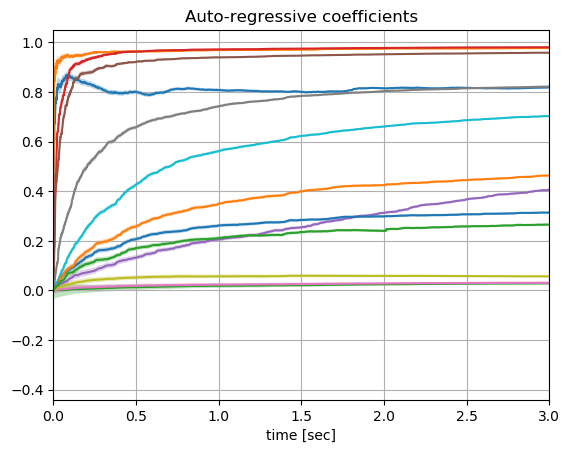

(nothing, PyObject Text(0.5, 1.0, 'Auto-regressive coefficients'), PyObject Text(0.5, 24.0, 'time [sec]'), (0, 3))

In [6]:
for k = 1:size(Œº_Œ∏_mem,2)
    plt.plot(t[bufsize:end], Œº_Œ∏_mem[bufsize:end,k])
    plt.fill_between(t[bufsize:end], Œº_Œ∏_mem[bufsize:end,k].+sqrt.(Œ£_Œ∏_mem[bufsize:end,k]), Œº_Œ∏_mem[bufsize:end,k].-sqrt.(Œ£_Œ∏_mem[bufsize:end,k]), alpha=0.3)
end
plt.grid(), plt.title("Auto-regressive coefficients"), plt.xlabel("time [sec]"), plt.xlim(0, 3)

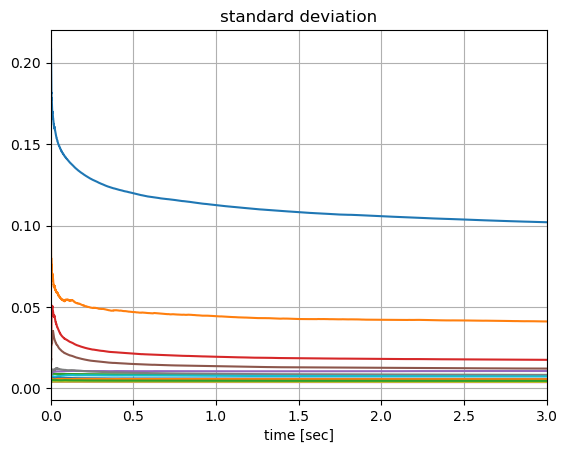

(nothing, PyObject Text(0.5, 1.0, 'standard deviation'), PyObject Text(0.5, 24.0, 'time [sec]'), (0, 3))

In [7]:
plt.plot(t[bufsize:end,:], 1 ./ sqrt.(m_Œ≥_mem[bufsize:end,:]))
plt.grid(), plt.title("standard deviation"), plt.xlabel("time [sec]"), plt.xlim(0, 3)

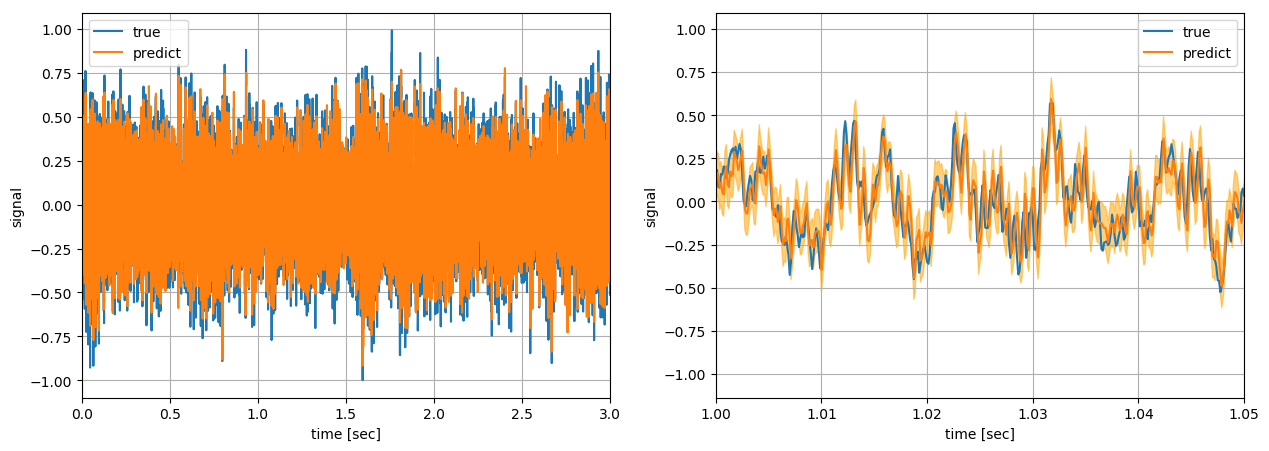

(nothing, PyObject <matplotlib.legend.Legend object at 0x0000000063039710>, (1.0, 1.05), PyObject Text(0.5, 24.0, 'time [sec]'), PyObject Text(658.0909090909089, 0.5, 'signal'))

In [8]:
_, ax = plt.subplots(ncols=2, figsize=(15,5))
ax[1].plot(t[bufsize:end], yi[bufsize:end], label="true")
ax[1].plot(t[bufsize:end], Œº_x_mem[bufsize:end], label="predict")
ax[1].grid(), ax[1].legend(), ax[1].set_xlim(0,3), ax[1].set_xlabel("time [sec]"), ax[1].set_ylabel("signal")
ax[2].plot(t[bufsize:end], yi[bufsize:end], label="true")
ax[2].plot(t[bufsize:end], Œº_x_mem[bufsize:end], label="predict")
ax[2].fill_between(t[bufsize:end], Œº_x_mem[bufsize:end] .+ sqrt.(Œ£_x_mem[bufsize:end]), Œº_x_mem[bufsize:end] .- sqrt.(Œ£_x_mem[bufsize:end]), alpha=0.5, color="orange")
ax[2].grid(), ax[2].legend(), ax[2].set_xlim(1.0,1.05), ax[2].set_xlabel("time [sec]"), ax[2].set_ylabel("signal")

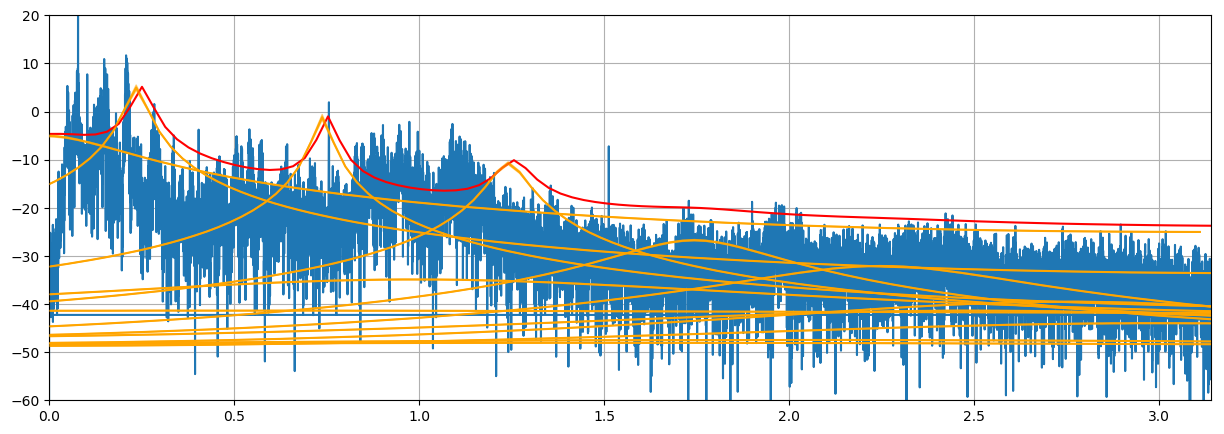

In [9]:
plt.figure(figsize=(15,5))

plt.plot(FFTW.fftfreq(length(yi), fs)/fs*2*pi, 10*log10.((abs.(FFTW.fft(yi)).^2)./length(yi)))

tmp_psd = zeros(101)
for k = 1:length(f)
    Œ∏_sampled, Œ≥_sampled = AR_distributions([Œº_Œ∏_mem[end,k]], mat(1/Œ£_Œ∏_mem[end,k]), a_Œ≥[k], b_Œ≥[k])
    mean_psd, std_psd = summary_psd(Œ∏_sampled, Œ≥_sampled)
    mean_psd = vcat(reverse(mean_psd), mean_psd[2:end])
    std_psd = vcat(reverse(std_psd), std_psd[2:end])
    Œ∏x = collect(0:length(mean_psd)-1)/length(mean_psd)*2*pi .- pi .+ 2*pi*f[k]/fs
    gca().plot(Œ∏x, mean_psd, color="orange", label="predicted psd")
    gca().fill_between(Œ∏x, mean_psd .- std_psd, mean_psd .+ std_psd, color="orange", alpha=0.5, zorder=100)
    tmp_psd = tmp_psd + 10 .^(mean_psd[101-Int(round(f[k]/fs*200)):201-Int(round(f[k]/fs*200))]/10)
end
gca().plot(collect(0:100)/100*pi, 10*log10.(tmp_psd), color="red")
plt.ylim(-60,20)
plt.xlim(0,pi)
plt.grid()

## Predictive performance

In [10]:
x_true = yi[bufsize:end]
x_Œº_pred = Œº_x_mem[bufsize:end]
x_œÉ_pred = sqrt.(abs.(Œ£_x_mem[bufsize:end]));

In [11]:
MSE = mean(abs2.(x_true - x_Œº_pred))
MAE = mean(abs.(x_true - x_Œº_pred))
BME = mean([logpdf(Normal(x_Œº_pred[k], x_œÉ_pred[k]), x_true[k]) for k = 1:length(x_true)])

MSE, MAE, BME

(0.017094485346747214, 0.10430874063733937, 0.5799067504345887)